# Data Analysis - World Cup Scorers

## L'objectif de cette analyse est de savoir quel footballeur aura le record de buts inscrits en Coupe du Monde

#### Source : https://github.com/jfjelstul/worldcup/blob/master/data-csv/goals.csv

### - Pour commencer, j'importe les librairies nécessaires à l'analyse de données ainsi que ma dataset

In [59]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('goals.csv')

### - Elle contient l'intégralité des matchs de Coupe du Monde depuis sa première édition en 1930

In [3]:
df.head()

,key_id,goal_id,tournament_id,tournament_name,match_id,match_name,match_date,stage_name,group_name,team_id,...,shirt_number,player_team_id,player_team_name,player_team_code,minute_label,minute_regulation,minute_stoppage,match_period,own_goal,penalty
0,1,G-0001,WC-1930,1930 FIFA World Cup,M-1930-01,France v Mexico,1930-07-13,group stage,Group 1,T-28,...,0,T-28,France,FRA,19',19,0,first half,0,0
1,2,G-0002,WC-1930,1930 FIFA World Cup,M-1930-01,France v Mexico,1930-07-13,group stage,Group 1,T-28,...,0,T-28,France,FRA,40',40,0,first half,0,0
2,3,G-0003,WC-1930,1930 FIFA World Cup,M-1930-01,France v Mexico,1930-07-13,group stage,Group 1,T-28,...,0,T-28,France,FRA,43',43,0,first half,0,0
3,4,G-0004,WC-1930,1930 FIFA World Cup,M-1930-01,France v Mexico,1930-07-13,group stage,Group 1,T-44,...,0,T-44,Mexico,MEX,70',70,0,second half,0,0
4,5,G-0005,WC-1930,1930 FIFA World Cup,M-1930-01,France v Mexico,1930-07-13,group stage,Group 1,T-28,...,0,T-28,France,FRA,87',87,0,second half,0,0


In [33]:
df.shape

(2720, 27)

### - J'effectue une commande qui va me retourner le nom de chaque colonnes

In [3]:
df.columns

Index(['key_id', 'goal_id', 'tournament_id', 'tournament_name', 'match_id',
       'match_name', 'match_date', 'stage_name', 'group_name', 'team_id',
       'team_name', 'team_code', 'home_team', 'away_team', 'player_id',
       'family_name', 'given_name', 'shirt_number', 'player_team_id',
       'player_team_name', 'player_team_code', 'minute_label',
       'minute_regulation', 'minute_stoppage', 'match_period', 'own_goal',
       'penalty'],
      dtype='object')

### - Je fais un tri dans mes colonnes en me séparant de celles dont je n'aurais pas besoin

In [4]:
df = df.drop(columns =['group_name', 'shirt_number','team_id','player_team_id','goal_id','player_team_code',
                       'minute_label','minute_stoppage','own_goal'])

### - J'effectue une commande qui va mepermettre afin de connaître le type de chaque colonne

In [5]:
df.dtypes

key_id                int64
tournament_id        object
tournament_name      object
match_id             object
match_name           object
match_date           object
stage_name           object
team_name            object
team_code            object
home_team             int64
away_team             int64
player_id            object
family_name          object
given_name           object
player_team_name     object
minute_regulation     int64
match_period         object
penalty               int64
dtype: object

In [6]:
df.describe(include = 'all')

,key_id,tournament_id,tournament_name,match_id,match_name,match_date,stage_name,team_name,team_code,home_team,away_team,player_id,family_name,given_name,player_team_name,minute_regulation,match_period,penalty
count,2720.00000,2720,2720,2720,2720,2720,2720,2720,2720,2720.000000,2720.000000,2720,2720,2720,2720,2720.000000,2720,2720.000000
unique,NaN,22,22,886,708,372,8,81,80,NaN,NaN,1437,1353,879,82,NaN,8,NaN
top,NaN,WC-2022,2022 FIFA World Cup,M-1954-19,Brazil v Sweden,1934-05-27,group stage,Brazil,BRA,NaN,NaN,P-05224,Müller,not applicable,Brazil,NaN,second half,NaN
freq,NaN,172,172,12,28,43,1808,237,237,NaN,NaN,16,29,263,238,NaN,1425,NaN
mean,1360.50000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.626103,0.373897,NaN,NaN,NaN,NaN,51.580882,NaN,0.078676
std,785.34069,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.483926,0.483926,NaN,NaN,NaN,NaN,27.534339,NaN,0.269283
min,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,1.000000,NaN,0.000000
25%,680.75000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,28.000000,NaN,0.000000
50%,1360.50000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN,NaN,53.000000,NaN,0.000000
75%,2040.25000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,75.000000,NaN,0.000000


### - Ce graphique présente le nombre de buts marqués par Coupe

<AxesSubplot:>

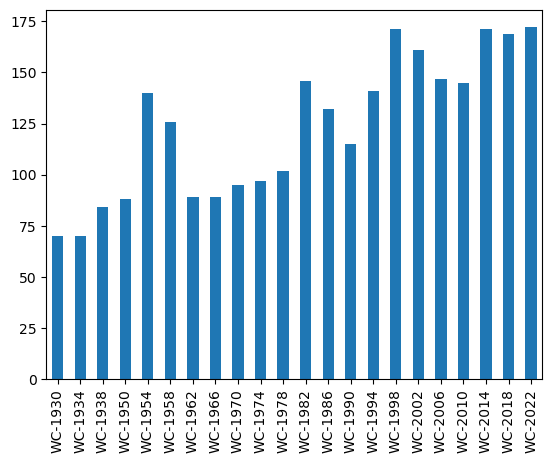

In [11]:
df['tournament_id'].value_counts(sort=False).plot.bar()

### - Celui nous montre les 10 joueurs ayant inscrit le plus de buts

<AxesSubplot:>

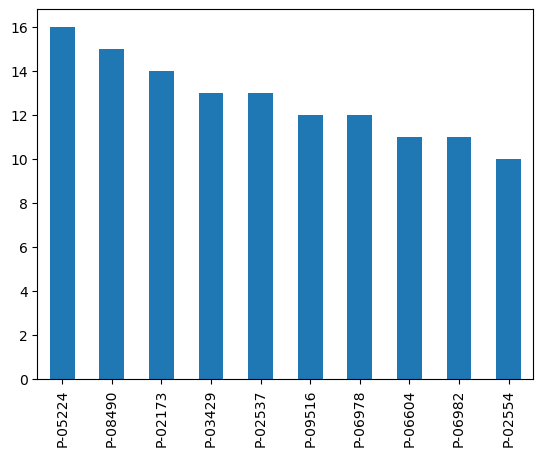

In [25]:
df['player_id'].value_counts()[:10].plot.bar()

### - Celui nous montre les 7 joueurs ayant inscrit le plus de buts

<BarContainer object of 7 artists>

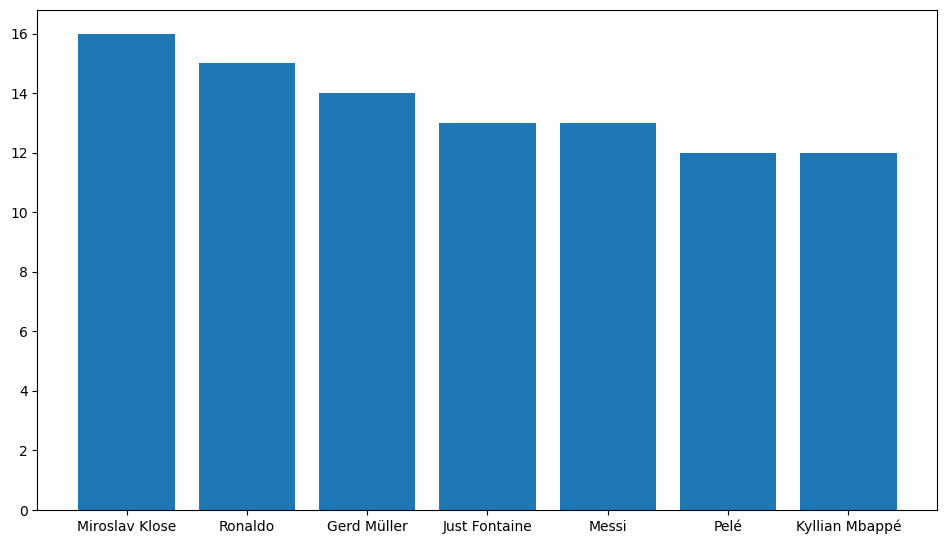

In [49]:
fig = plt.figure(figsize=(9, 5))
ax = fig.add_axes([0,0,1,1])
players = ['Miroslav Klose','Ronaldo','Gerd Müller','Just Fontaine','Messi','Pelé','Kyllian Mbappé']
goals = [16,15,14,13,13,12,12]
ax.bar(players,goals)

#### ( Je remarque que la majorité des joueurs, à part Messi et Mbappé, sont des anciens joueurs ayant pris leurs retraite, donc leurs compteur de but ne bougera plus ) 

### - Celui nous présente leurs buts par rapport aux nombres de Coupe du Monde joué

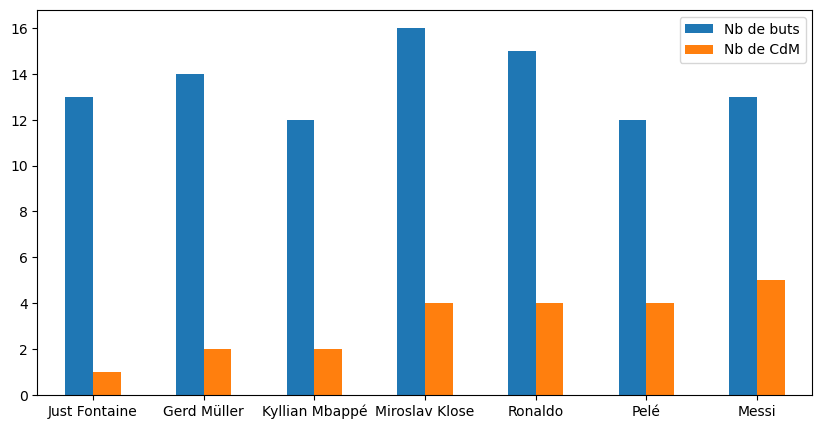

In [92]:
goals = [13,14,12,16,15,12,13]

nb_cdm = [1,2,2,4,4,4,5]

mydata = pd.DataFrame({"Nb de buts":goals,"Nb de CdM":nb_cdm})

mydata.index = ['Just Fontaine','Gerd Müller','Kyllian Mbappé','Miroslav Klose','Ronaldo','Pelé','Messi']

from pandas import plotting

mydata.plot(kind="bar",rot=0, figsize=(10, 5)) 
plt.show()

### - Celui nous présente leurs buts par rapport aux nombres de match joué

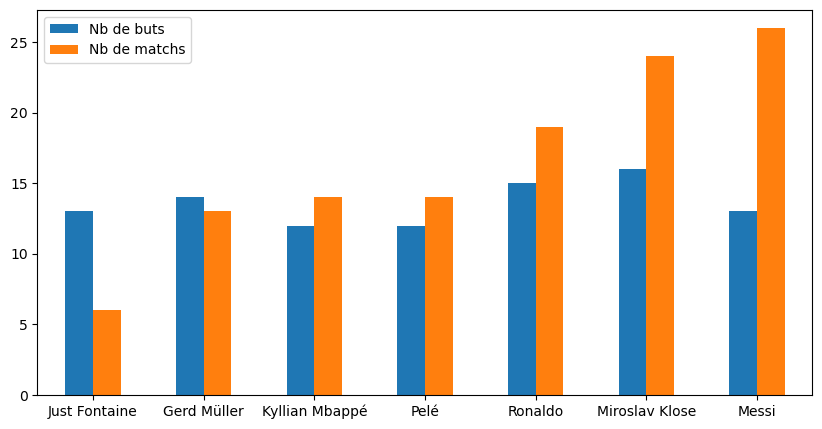

In [122]:
goals = [13,14,12,12,15,16,13]

nb_match = [6,13,14,14,19,24,26]

mydata = pd.DataFrame({"Nb de buts":goals,"Nb de matchs":nb_match})

mydata.index = ['Just Fontaine','Gerd Müller','Kyllian Mbappé','Pelé','Ronaldo','Miroslav Klose','Messi']

from pandas import plotting

mydata.plot(kind="bar",rot=0, figsize=(10, 5)) 
plt.show()

In [120]:
liste =[['Just Fontaine',13,1],
        ['Gerd Müller',14,2], 
        ['Kyllian Mbappé',12,2],                       
        ['Miroslav Klose',16,4], 
        ['Ronaldo',15,4],                       
        ['Pelé',12,4],
        ['Messi',13,5]]

In [121]:
for i in liste :
    print(i[0], ':', i[1]/i[2], 'buts par CdM')

Just Fontaine : 13.0 buts par CdM
Gerd Müller : 7.0 buts par CdM
Kyllian Mbappé : 6.0 buts par CdM
Miroslav Klose : 4.0 buts par CdM
Ronaldo : 3.75 buts par CdM
Pelé : 3.0 buts par CdM
Messi : 2.6 buts par CdM


### Conclusion
##### - Le nombre de buts ne signifie pas tous, il est nécessaire d'ajouté à ça le nombre de participation pour mieux comparer les joueurs
##### - Le nombre de matchs joué est tout aussi important, car il peut arrivé qu'un joueur ne joue pas tous les match de la compétition
##### - Kyllian Mbappé sera sûrement le joueur avec le plus de but en Coupe du Monde de part ses superbes performances en seulement 2 participation mais aussi de part son jeune âge, ce qui lui permettra de pouvoir en joué au moins 3 autres 